In [1]:
import torch
from utils import *
from models import *
import argparse
import torch.nn.functional as F

device = 'cuda'
torch.cuda.set_device(4)

In [2]:
train_iterator, valid_iterator, test_iterator, TEXT = get_SSTdata()

In [3]:
DROPOUT = 0.5
HIDDEN_DIM = 512
FILTER_SIZES = 3
num_epochs = 5

lr = 0.001
N_FILTERS = 8

INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
OUTPUT_DIM = 5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

#model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
model = RNN(INPUT_DIM, EMBEDDING_DIM, DROPOUT, HIDDEN_DIM, OUTPUT_DIM).to(device)

In [4]:
print(model)

RNN(
  (embedding): Embedding(17199, 300)
  (rnn): RNN(300, 512)
  (fc): Linear(in_features=512, out_features=5, bias=True)
  (dropout): Dropout(p=0.5)
)


In [38]:
print(model)

RNN(
  (embedding): Embedding(17199, 300)
  (rnn): RNN(300, 512)
  (fc): Linear(in_features=512, out_features=5, bias=True)
  (dropout): Dropout(p=0.5)
)


In [34]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

Beginning to Train
Training: epoch: [1/5] Loss: [1.41] Accuracy [36.79] Eval: Loss: [1.16] Accuracy[45.78]
Training: epoch: [2/5] Loss: [1.19] Accuracy [45.26] Eval: Loss: [1.08] Accuracy[48.41]
Training: epoch: [3/5] Loss: [1.10] Accuracy [48.36] Eval: Loss: [1.03] Accuracy[51.41]
Training: epoch: [4/5] Loss: [1.04] Accuracy [52.26] Eval: Loss: [1.01] Accuracy[50.59]
Training: epoch: [5/5] Loss: [0.99] Accuracy [55.00] Eval: Loss: [1.01] Accuracy[51.32]
TESTING
Testing: Loss: [0.98] Accuracy [55.11]


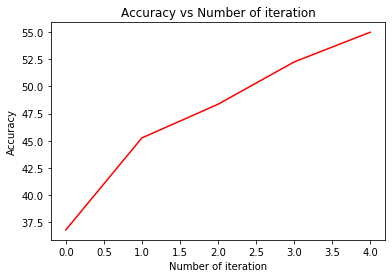

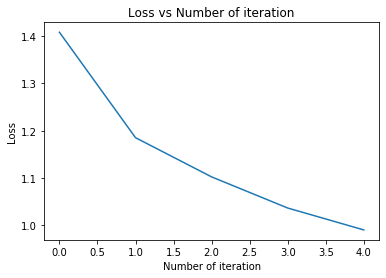

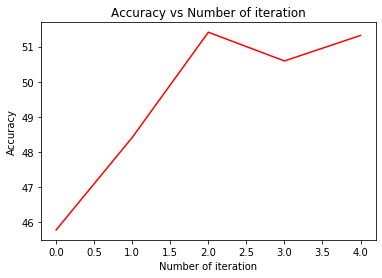

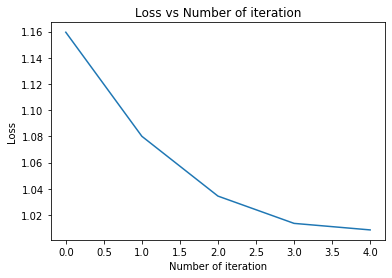

In [35]:
history = train_eval(model, train_iterator, valid_iterator, 5 , optimizer, criterion ,device)
test(model,test_iterator,criterion,device)

visualize_train_acc(history)
visualize_train_loss(history)
visualize_eval_acc(history)
visualize_eval_loss(history)